### 1. Introduction
- A new pharmaceutical startup is recently acquired by one of the world's largest MNCs. 
- For the acquisition process, the startup is required to tabulate all drugs that they have sold and account for each drug's effectiveness.


### 2. Problem Statement
- A dedicated team has been assigned the task to analyze all the data. 
- This data has been collected over the years and it contains data points such as the drug's name, reviews by customers, popularity and use cases of the drug, and so on. 
- Members of this team are by the noise present in the data.

### 3. Task 
- Task is to make a sophisticated NLP-based Machine Learning model that has the mentioned features as the input. 
- Also, use the input to predict the base score of a certain drug in a provided case

### 4. Dataset Decsription

The dataset has the following columns:

|**Variable Name**|**Description**|
|:--|:--
|**patient_id**|ID of patients|
|**name_of_drug**|Name of the drug prescribed|
|**use_case_for_drug**|Purpose of the drug|
|**review_by_patient**|Review by patient|
|**drug_approved_by_UIC**|Date of approval of the drug by UIC|
|**number_of_times_prescribed**|Number of times the drug is prescribed|
|**effectiveness_rating**|Effectiveness of drug|
|**base_score**|Generated score (Target Variable)|

### 5. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### 6. Loading Dataset

In [5]:
data_train=pd.read_csv(r'C:/Users/INTEL/Downloads/dataset/train.csv')
data_train.shape

(32165, 8)

In [6]:
data_test=pd.read_csv(r'C:/Users/INTEL/Downloads/dataset/test.csv')
data_test.shape

(10760, 7)

In [7]:
data_train.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [9]:
data_train.describe(include='all')

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
count,32165.000000,32165,32165,32165,32165.000000,32165,32165.000000,32165.000000
unique,NaN,2220,636,30121,NaN,3537,NaN,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,20-Jan-16,NaN,NaN
freq,NaN,724,5795,8,NaN,37,NaN,NaN
mean,115487.511052,NaN,NaN,NaN,6.998912,NaN,27.893207,6.664261
std,67146.156602,NaN,NaN,NaN,3.274781,NaN,35.819035,1.588699
min,9.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.899076
25%,56922.000000,NaN,NaN,NaN,5.000000,NaN,6.000000,6.109307
50%,115776.000000,NaN,NaN,NaN,8.000000,NaN,16.000000,6.788245
75%,173562.000000,NaN,NaN,NaN,10.000000,NaN,36.000000,7.900790


In [10]:
data_train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [19]:
data_test.head(5)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [20]:
data_test.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

In [22]:
data_train.dtypes

patient_id                      int64
name_of_drug                   object
use_case_for_drug              object
review_by_patient              object
effectiveness_rating            int64
drug_approved_by_UIC           object
number_of_times_prescribed      int64
base_score                    float64
dtype: object

In [12]:
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))

#BB97DD


In [13]:
import random
color = "%06x" % random.randint(0, 0xFFFFFF)

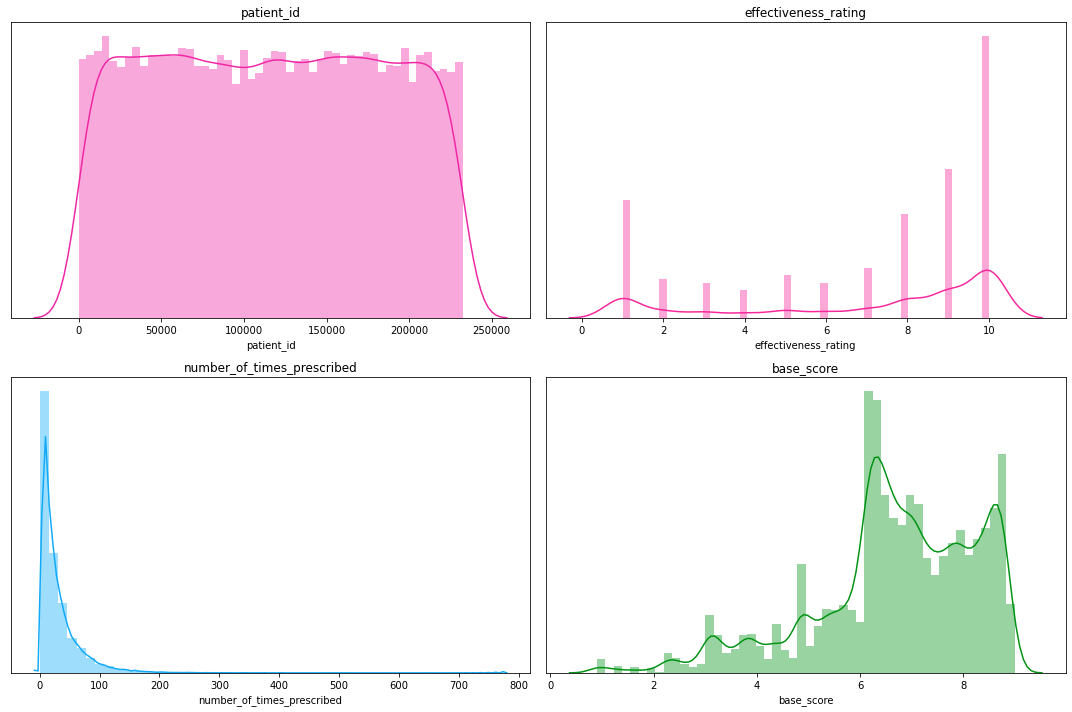

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = False, figsize=(15, 10))
colors = []
for i in range(4):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))
columns = ['patient_id','effectiveness_rating','number_of_times_prescribed','base_score']
for ax, col, color in zip(axes.flat, columns, colors):
    sns.distplot(a = data_train[col], bins = 50, ax = ax, color = color)
    ax.set_title(col)
    plt.setp(axes, yticks=[])
    ax.grid(False)
plt.tight_layout()
plt.show()

In [16]:
cat_list = []
for i in data_train.columns.values:
    if (data_train[i].dtype == 'object'):
        cat_list.append(i)
print('Total Categorical Features:', len(cat_list))
print("Categorical Features", cat_list)

Total Categorical Features: 4
Categorical Features ['name_of_drug', 'use_case_for_drug', 'review_by_patient', 'drug_approved_by_UIC']


In [19]:
duplicate=data_train.duplicated()
print(duplicate.sum())
data_train[duplicate]

0


,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score


In [49]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sweetviz in c:\programdata\anaconda3\lib\site-packages (2.1.3)



In [51]:
import sweetviz as sv

my_report = sv.analyze(data_train)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Observations:
- There are 32165 rows and 8 columns in train dataset and 10760 rows and 7 columns in test dataset
- There are 4 categorical and 4 numerical data and no missing data in both dataset
- No duplicate datas present
- Left skewed (median > mean) - effectiveness_rating
- Right skewed (mean > median) - number_of_times_prescribed
- Normally distributed values (mean=median=mode) - patient_id

### 7. EDA

#### What are the top 10 drugs used here?

In [20]:
data_train['name_of_drug'].value_counts()

Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Ogen                                   1
Depo-Testosterone                      1
Afrin NoDrip Sinus                     1
Umeclidinium                           1
Tetracaine                             1
Name: name_of_drug, Length: 2220, dtype: int64

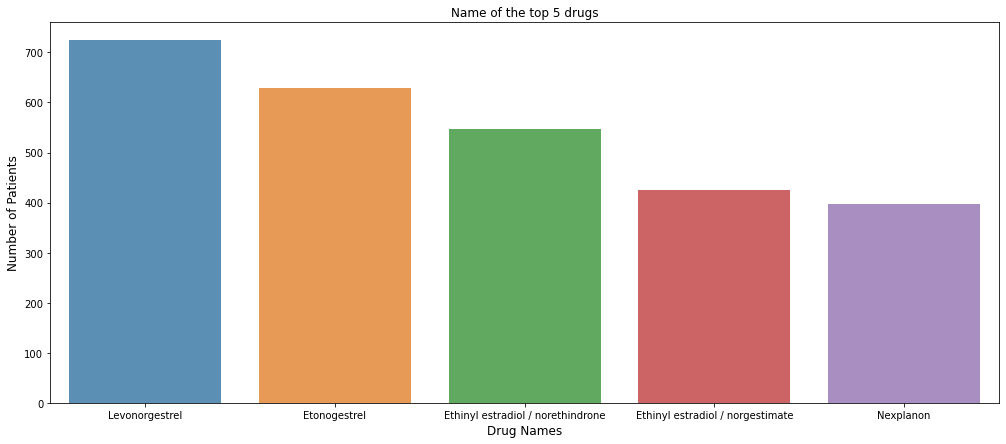

In [21]:
drug_count  = data_train['name_of_drug'].value_counts()
drug_count = drug_count[:5,]
plt.figure(figsize=(17,7))
sns.barplot(drug_count.index, drug_count.values, alpha=0.8)
plt.title('Name of the top 5 drugs')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Drug Names', fontsize=12)
plt.show()

#### What are the medical related conditions?

In [22]:
data_train['use_case_for_drug'].value_counts()

Birth Control                                            5795
Depression                                               1791
Pain                                                     1273
Anxiety                                                  1174
Acne                                                     1101
                                                         ... 
Meningococcal Meningitis Prophylaxis                        1
Stress Ulcer Prophylaxis                                    1
Dumping Syndrome                                            1
ge HCT (amlodipine / hydrochlorothiazide / valsartan)       1
Cutaneous T-cell Lymphoma                                   1
Name: use_case_for_drug, Length: 636, dtype: int64

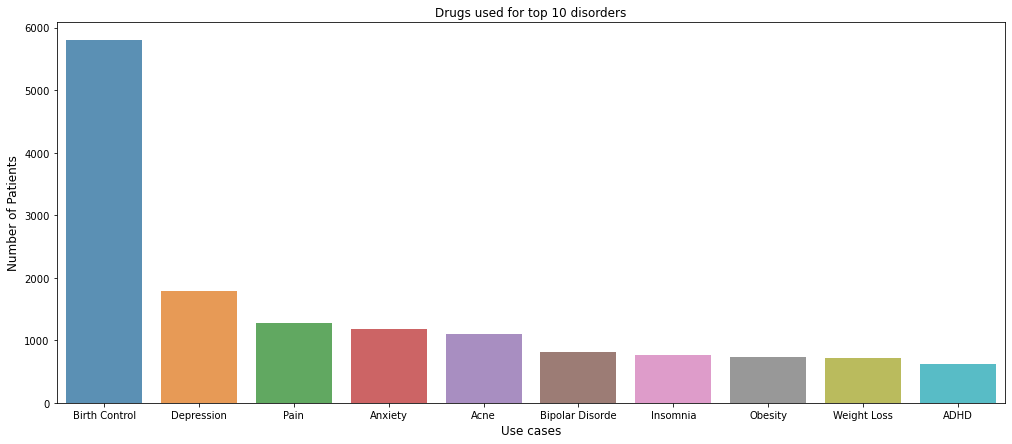

In [23]:
drug_usecase  = data_train['use_case_for_drug'].value_counts()
drug_usecase = drug_usecase[:10,]
plt.figure(figsize=(17,7))
sns.barplot(drug_usecase.index, drug_usecase.values, alpha=0.8)
plt.title('Drugs used for top 10 disorders')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Use cases', fontsize=12)
plt.show()

- Birth control pills are majority of use cases and Levonorgestrel medicine is mostly used for preventing pregnancy. 

#### Which are the top birth control pills used?

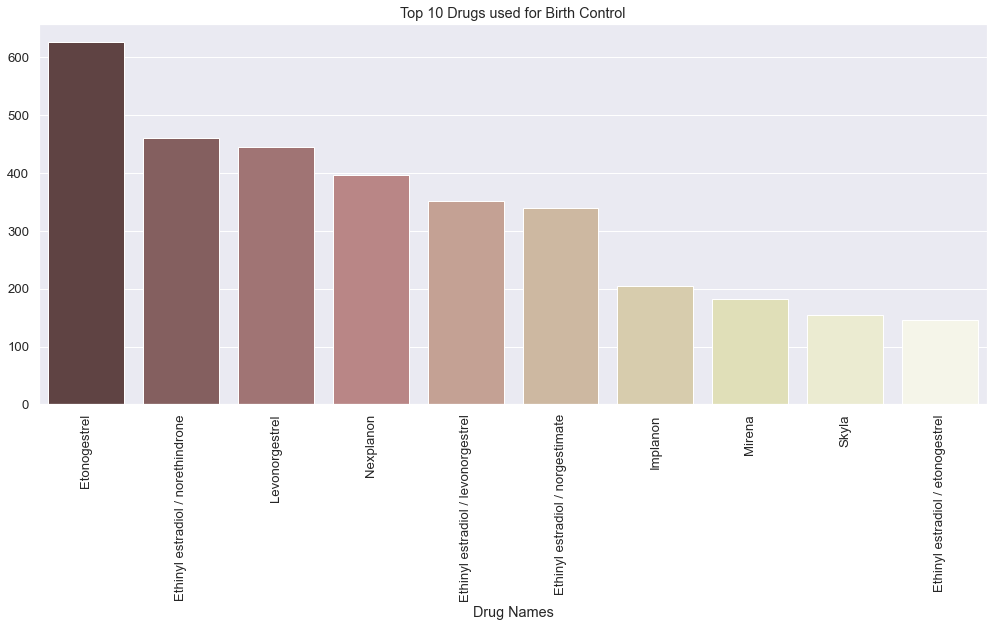

In [31]:
plt.figure(figsize=(17,7))
birth_control_pills = data_train[data_train['use_case_for_drug'] == 'Birth Control']['name_of_drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = birth_control_pills.index, y = birth_control_pills.values, palette = 'pink')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

##### Etonogestrel is the most prominent drug at a big margin

#### Which drugs was prescribed frequently and for which medical condition?

In [63]:
data_train['number_of_times_prescribed'].value_counts()

2      1270
0      1255
3      1255
4      1237
1      1205
       ... 
343       1
247       1
215       1
342       1
559       1
Name: number_of_times_prescribed, Length: 303, dtype: int64

count    32165.000000
mean        27.893207
std         35.819035
min          0.000000
25%          6.000000
50%         16.000000
75%         36.000000
max        771.000000
Name: number_of_times_prescribed, dtype: float64


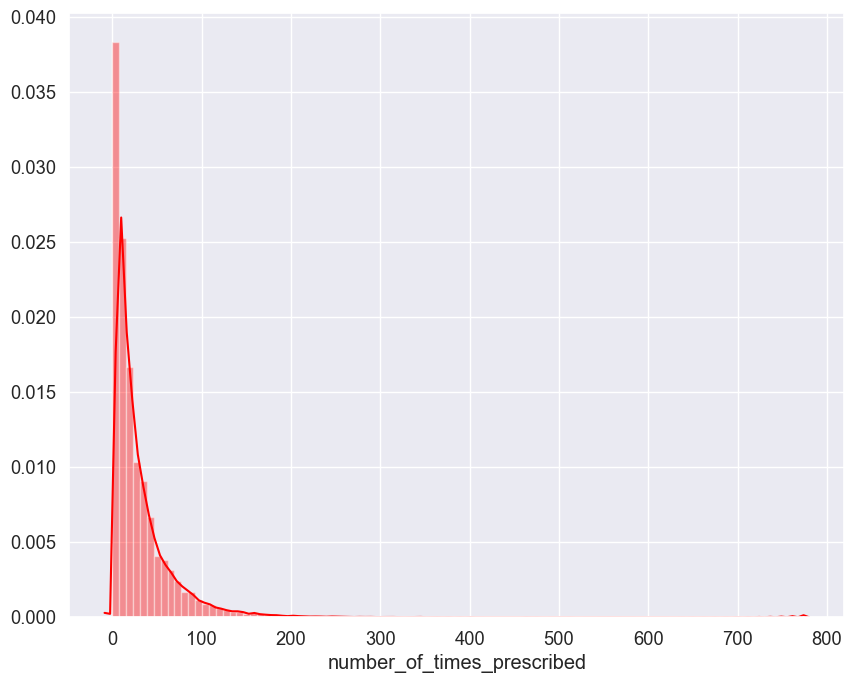

In [64]:
print(data_train['number_of_times_prescribed'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(data_train['number_of_times_prescribed'], color='red', bins=100, hist_kws={'alpha': 0.4});

#### Feature Engineering for Ratings

In [32]:
data_train['effectiveness_rating'].value_counts()

10    10252
9      5429
1      4295
8      3786
7      1832
5      1581
2      1422
6      1289
3      1267
4      1012
Name: effectiveness_rating, dtype: int64

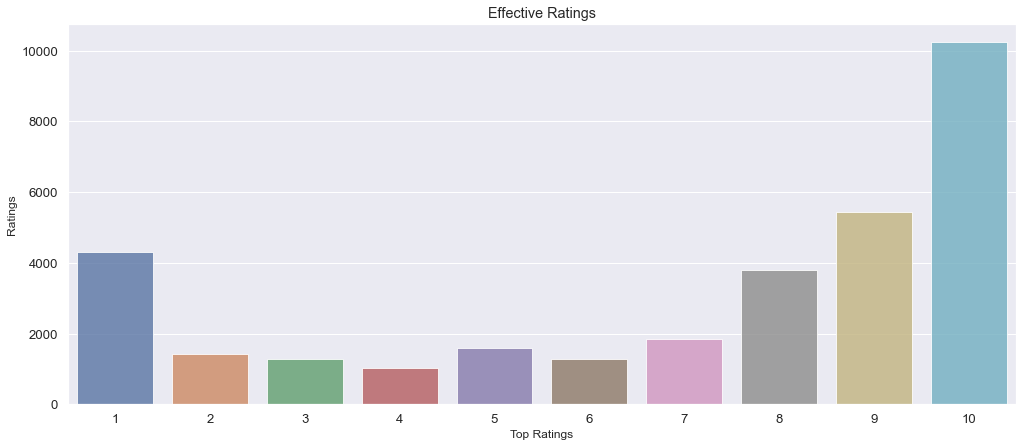

In [33]:
ratings  = data_train['effectiveness_rating'].value_counts()
ratings = ratings[:10,]
plt.figure(figsize=(17,7))
sns.barplot(ratings.index, ratings.values, alpha=0.8)
plt.title('Effective Ratings')
plt.ylabel('Ratings', fontsize=12)
plt.xlabel('Top Ratings', fontsize=12)
plt.show()

#### Categorizing ratings below 5 and above or equal to 5 

In [34]:
data_train.loc[(data_train['effectiveness_rating'] >= 5), 'ratings'] = 1
data_train.loc[(data_train['effectiveness_rating'] < 5), 'ratings'] = 0

data_train['ratings'].value_counts()

1.0    24169
0.0     7996
Name: ratings, dtype: int64

Text(0.5, 1.0, 'Effective Ratings Ratio')

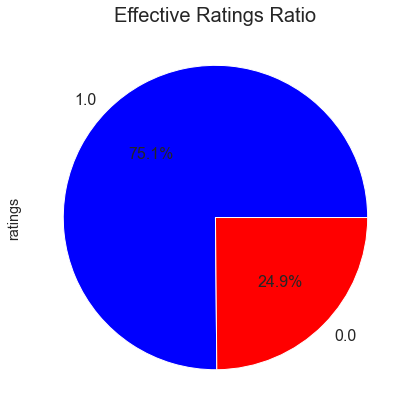

In [38]:
data_train['ratings'].value_counts().plot(kind='pie', 
                                         figsize=(16,7), autopct='%1.1f%%',
                                         explode=(0,0), fontsize=16, colormap= 'bwr')
plt.title('Effective Ratings Ratio', fontsize=20)

##### Effective ratings on a scale of 10, 75.1% have rated the medical products/drugs above 5, which is good or helped them to provide a relief. 
##### While 24.9% have rated it below 5, which might have caused a side effect or a medical condition. 

In [72]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

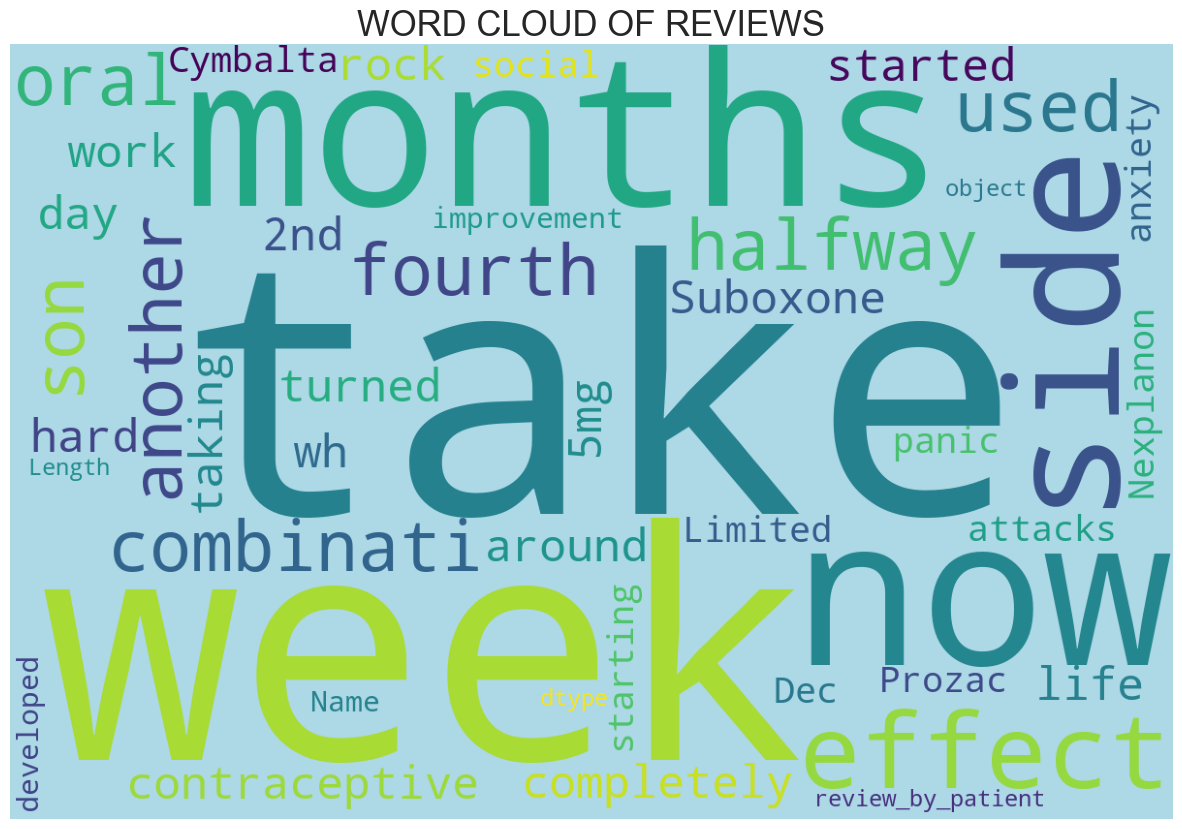

In [73]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data_train['review_by_patient']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Breaking datetime into year, month, and day

In [39]:
data_train['drug_approved_by_UIC'] = pd.to_datetime(data_train['drug_approved_by_UIC'], errors = 'coerce')

##### Extracting year from date

In [40]:
data_train['Year'] = data_train['drug_approved_by_UIC'].dt.year

##### Extracting the month from the date

In [41]:
data_train['month'] = data_train['drug_approved_by_UIC'].dt.month

##### Extracting the days from the date

In [42]:
data_train['day'] = data_train['drug_approved_by_UIC'].dt.day

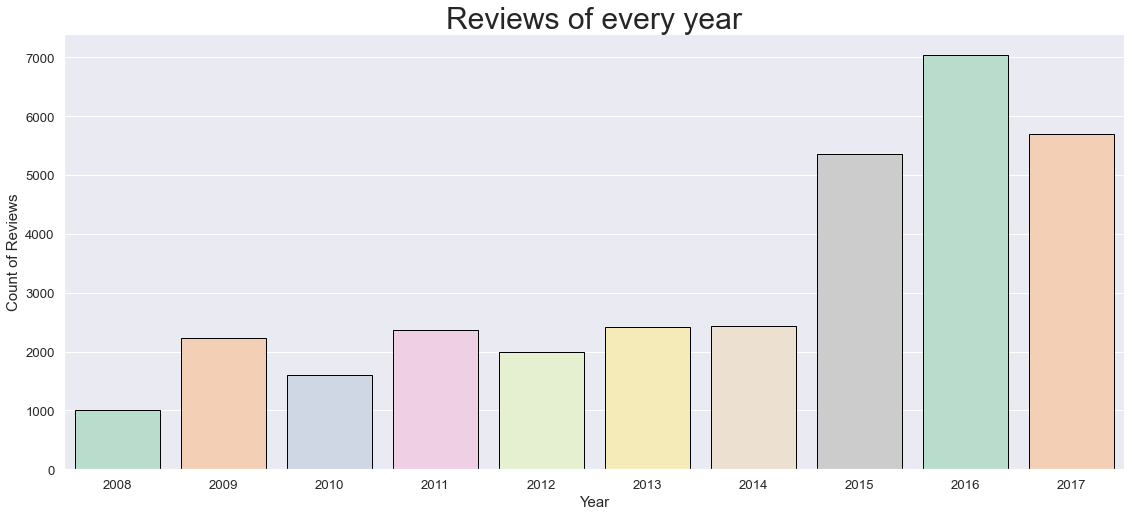

In [46]:
plt.figure(figsize=(19, 8))
sns.countplot(data_train['Year'], palette ='Pastel2', edgecolor='black')
plt.title('Reviews of every year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

- Highest reviews received in the year 2016 and lowest reviews received in the year 2008

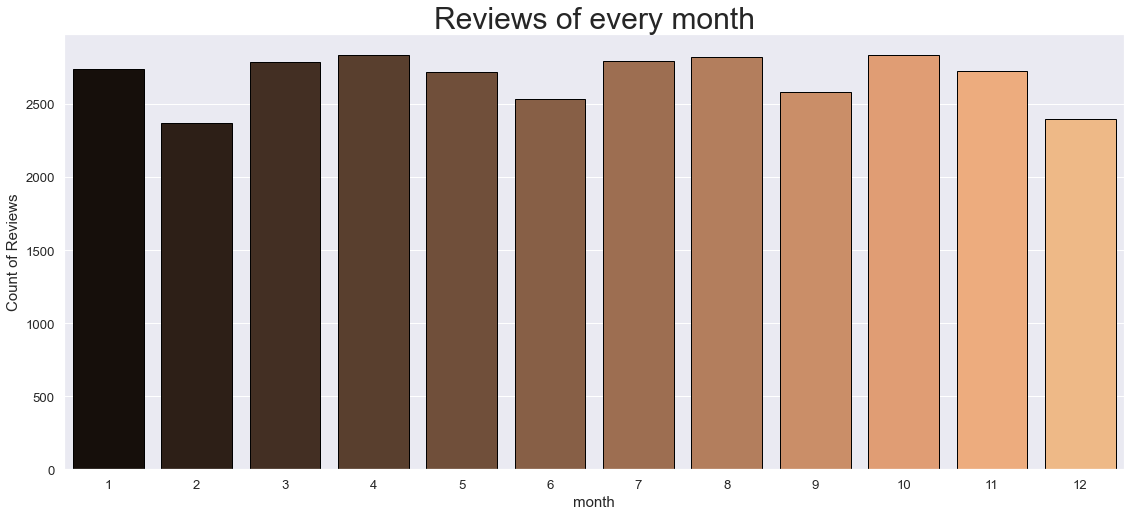

In [48]:
plt.figure(figsize=(19, 8))
sns.countplot(data_train['month'], palette ='copper', edgecolor='black')
plt.title('Reviews of every month', fontsize = 30)
plt.xlabel('month', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [67]:
data_train.corr()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score,ratings,Year,month,day
patient_id,1.000000,0.018803,0.017499,0.010924,0.014019,-0.009531,0.007546,-0.002294
effectiveness_rating,0.018803,1.000000,0.242224,0.412301,0.900079,-0.197356,-0.029063,0.009317
number_of_times_prescribed,0.017499,0.242224,1.000000,0.134295,0.198365,-0.271538,-0.036221,-0.002953
base_score,0.010924,0.412301,0.134295,1.000000,0.180842,-0.085285,-0.028621,0.007081
ratings,0.014019,0.900079,0.198365,0.180842,1.000000,-0.193231,-0.027064,0.010393
Year,-0.009531,-0.197356,-0.271538,-0.085285,-0.193231,1.000000,-0.086779,-0.012882
month,0.007546,-0.029063,-0.036221,-0.028621,-0.027064,-0.086779,1.000000,-0.019641
day,-0.002294,0.009317,-0.002953,0.007081,0.010393,-0.012882,-0.019641,1.000000


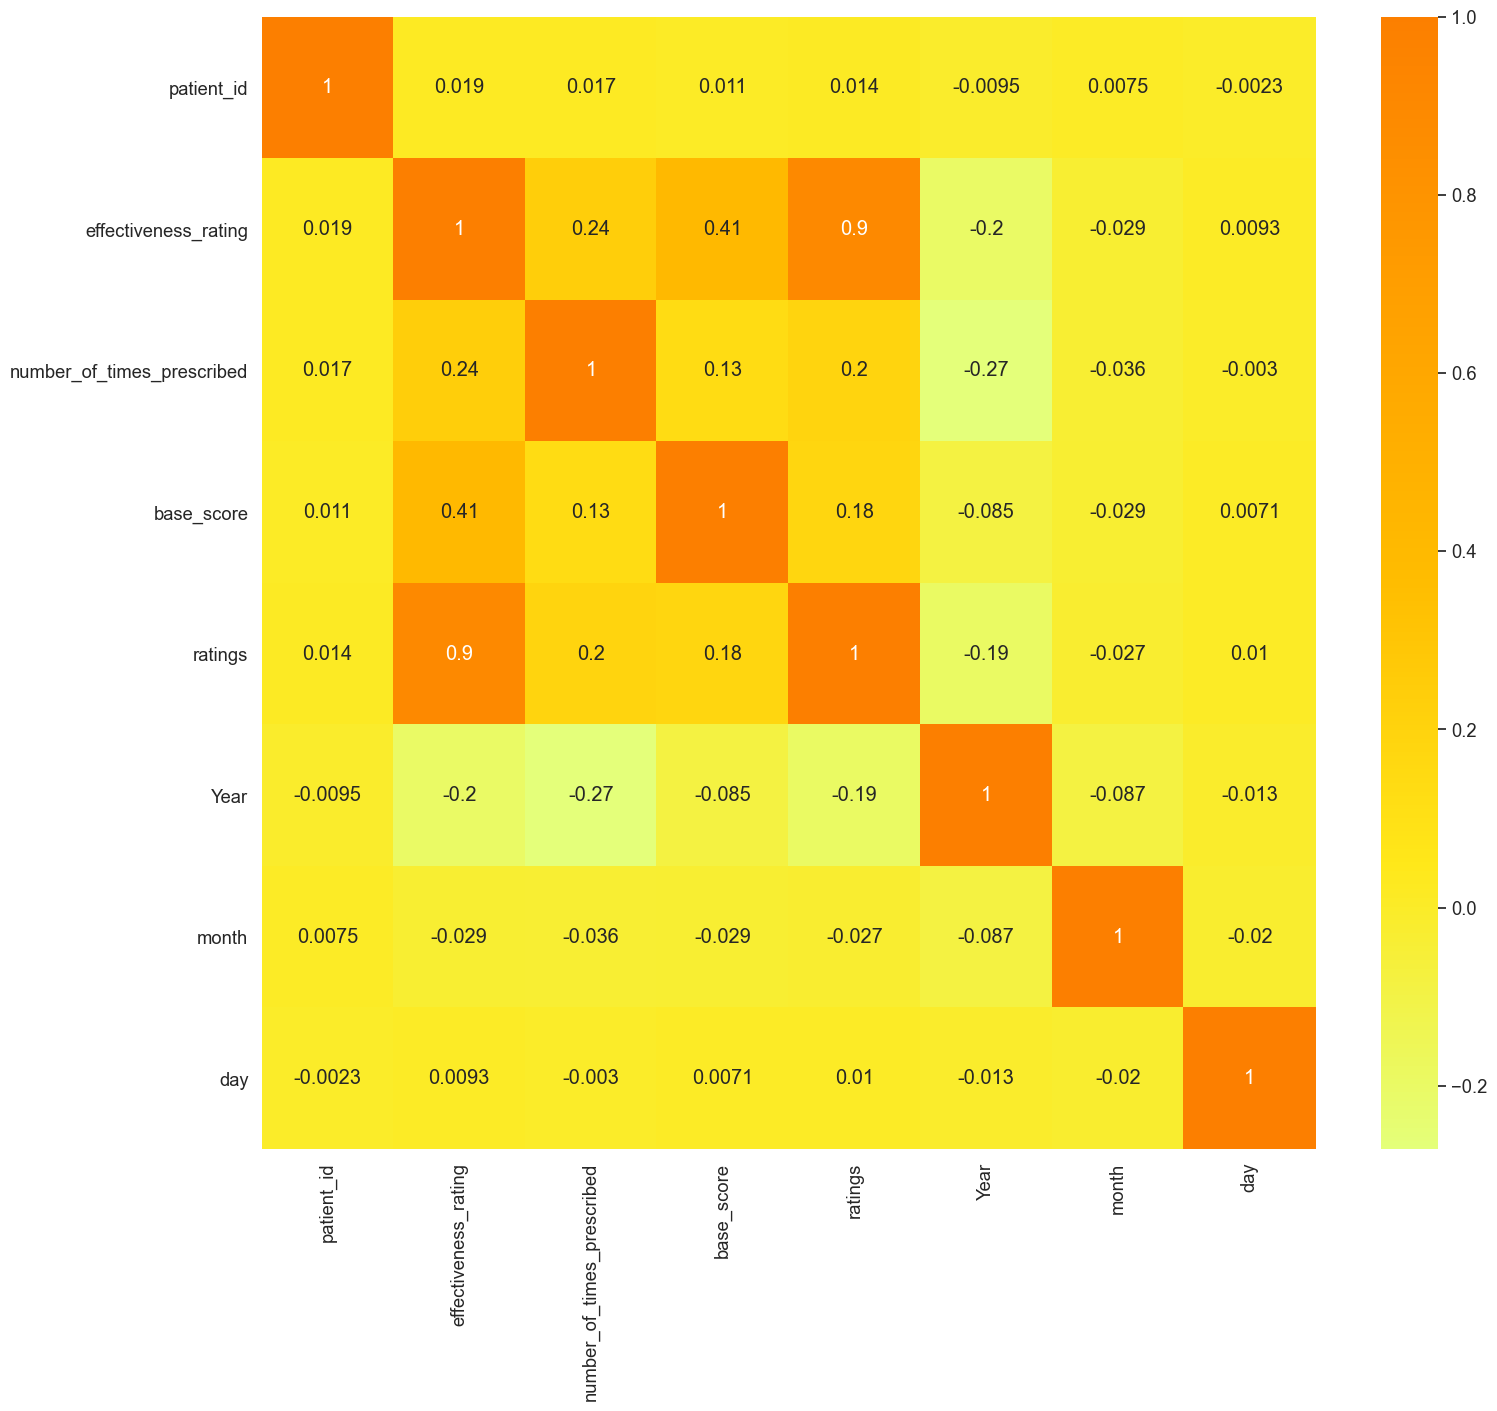

In [70]:
plt.figure(figsize=(17,15))
sns.heatmap(data_train.corr(), annot = True, cmap = 'Wistia')

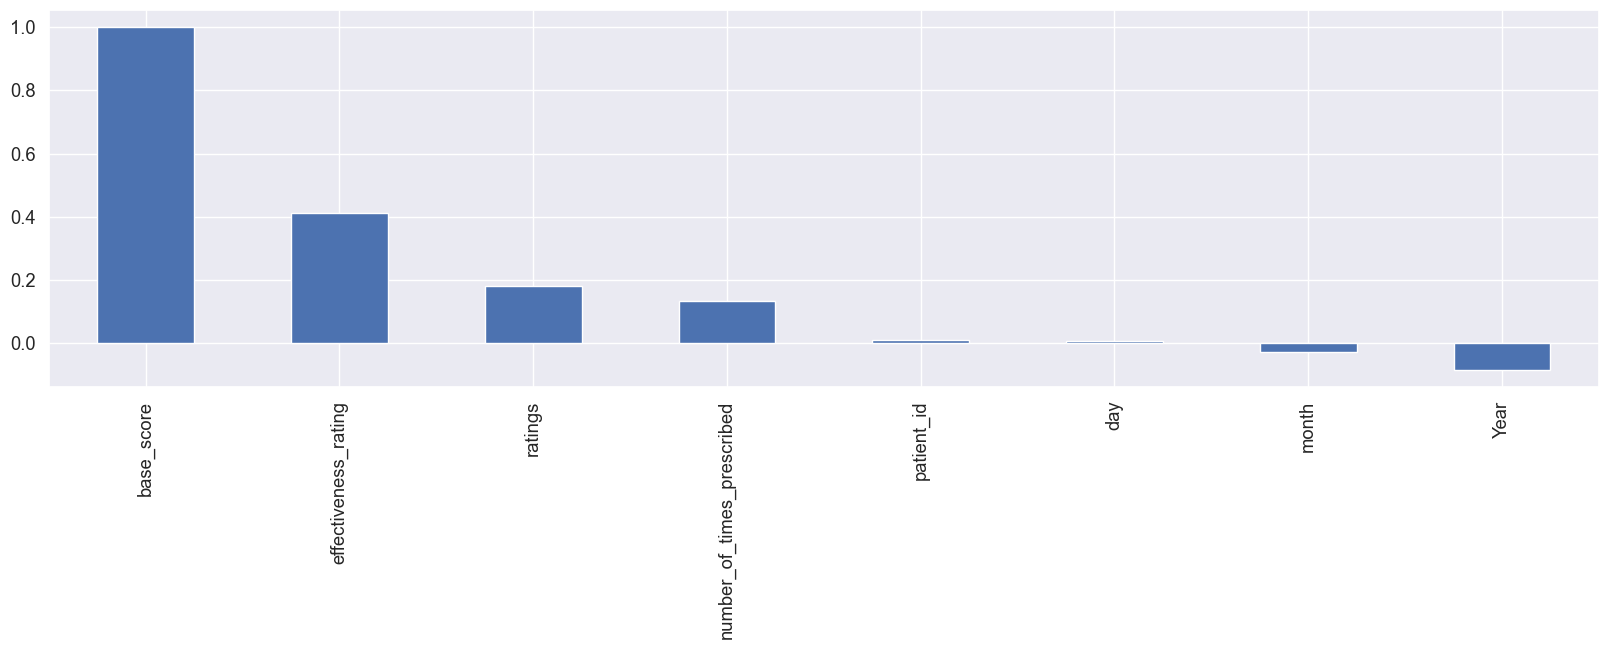

In [71]:
plt.figure(figsize=(16,10))
data_train.corr()['base_score'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

#### Importing train_test_split library

In [77]:
from sklearn.model_selection import train_test_split

In [80]:
data_train.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'ratings', 'Year', 'month',
       'day'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['name_of_drug','use_case_for_drug','review_by_patient']:
    label_encoder_feat[feature] = LabelEncoder()
    data_train[feature] = label_encoder_feat[feature].fit_transform(data_train[feature])

In [125]:
feature_cols = ['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score']
X = data_train[feature_cols]
X

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,2072,335,21000,9,2012-05-20,27,8.022969
1,95260,923,39,23254,8,2010-04-27,192,7.858458
2,92703,1212,110,15592,5,2009-12-14,17,6.341969
3,35696,332,412,25354,9,2016-11-27,37,6.590176
4,155963,436,105,182,2,2015-11-28,43,6.144782
...,...,...,...,...,...,...,...,...
32160,183202,533,76,9924,9,2013-06-10,89,6.963020
32161,109111,1413,110,11169,6,2017-04-06,0,0.899076
32162,121154,2091,433,3941,9,2016-11-10,25,6.241812
32163,45410,851,404,8790,8,2015-01-21,22,7.940428


In [126]:
y= data_train['base_score']
y

0        8.022969
1        7.858458
2        6.341969
3        6.590176
4        6.144782
           ...   
32160    6.963020
32161    0.899076
32162    6.241812
32163    7.940428
32164    8.205393
Name: base_score, Length: 32165, dtype: float64

#### Split the data in train and test

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape, y_train.shape)
print('Test data shape ',X_test.shape, y_test.shape)

Train data shape  (21550, 8) (21550,)
Test data shape  (10615, 8) (10615,)


In [128]:
X_test

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
12551,53310,2047,153,2268,8,2015-02-11,30,6.330843
7640,150060,1840,375,11091,9,2008-05-14,113,6.235363
24705,194030,1868,256,15527,5,2017-06-17,3,7.390379
27745,150774,1881,99,14789,10,2014-10-07,89,6.853083
30741,95428,1509,453,25093,10,2016-05-18,20,6.998161
...,...,...,...,...,...,...,...,...
18398,75583,907,315,9709,10,2014-05-25,45,6.831299
5088,3588,1636,476,10649,1,2017-11-02,0,3.054420
26131,32470,1169,278,11139,1,2014-06-09,64,4.654876
24215,176530,1186,76,22024,10,2014-05-17,60,8.703602


In [129]:
y_test

12551    6.330843
7640     6.235363
24705    7.390379
27745    6.853083
30741    6.998161
           ...   
18398    6.831299
5088     3.054420
26131    4.654876
24215    8.703602
6270     6.476183
Name: base_score, Length: 10615, dtype: float64

In [132]:
X = data_train.iloc[:,1:2].values
y = data_train.iloc[:,2].values

In [133]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [141]:
RandomForestRegressor(bootstrap=True, criterion='mse',
                      max_depth=None, max_features='auto',
                      max_leaf_nodes=None,min_samples_leaf=1, 
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, 
                      oob_score=False, random_state=0, 
                      verbose=0, warm_start=False)


RandomForestRegressor(random_state=0)

In [142]:
y_pred = RandomForestRegressor(X_test)

In [143]:
y_pred

RandomForestRegressor(n_estimators=       patient_id  name_of_drug  use_case_for_drug  review_by_patient  \
12551       53310          2047                153               2268   
7640       150060          1840                375              11091   
24705      194030          1868                256              15527   
27745      150774          1881                 99              14789   
30741       95428          1509                453              25093   
...           ...           ...                ...                ...   
18398       75583           907                315               9709   
5088         3588          1636                476              10649   
26131       32470          1169                278              11139   
24215      176530          1186                 76              22024   
6270        18837          1837                427              13617   

       effectiveness_rating drug_app...
12551                     8           2015-02-11

In [144]:
output = {'patient_id':data_test.index, 'base_score':y_pred}
output

{'patient_id': RangeIndex(start=0, stop=10760, step=1),
 'base_score': RandomForestRegressor(n_estimators=       patient_id  name_of_drug  use_case_for_drug  review_by_patient  \
 12551       53310          2047                153               2268   
 7640       150060          1840                375              11091   
 24705      194030          1868                256              15527   
 27745      150774          1881                 99              14789   
 30741       95428          1509                453              25093   
 ...           ...           ...                ...                ...   
 18398       75583           907                315               9709   
 5088         3588          1636                476              10649   
 26131       32470          1169                278              11139   
 24215      176530          1186                 76              22024   
 6270        18837          1837                427              13617   
 
     

### Conclusion- 
- Given data set is a miixture of sentimental analysis and regression and also classification. 
- In case of sentimental analysis- Reviews of patients tend to have both positive and negative, sometimes neutral reviews. 
- In case of regression model analysis - predictions of which drug is being effective for which medical condition. 
    - Here for analysis, we have used birthcontrol pills or medicines to predict which is fast selling tablets based on the histroy. 
- Classification - Predicting patient's condition based on confusion matrix model. 
- Data Visualizations here are helping to understand which and what kind of drugs are normally prescribed generally for which conditions.